## Insurance Claim Project

#### Aim : To predict if a building will have an insurance claim during a certain period or not.
#### Objective : To create a binary classification model to this perform this aim
#### Business problem : Predicting if a customer will request for insurance claim within a specific insured period 
#### Machine Learning problem : Understanding the given parameters, and checking how these parameter affect the insurance claim for the historical dataset
___
#### Methodology
* Import libraries
* Load dataset
* User defined functions
* Exploratory Data Analysis
* Check for anomalies, that is, outliers/noise, and clean the data
* Preprocessing
* Feature selection and engineering
* Dealing with imbalanced dataset
* Build models and make predictions
* Check for accuracy, using evaluation metrics
* Present / Submit the results

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from pandas_profiling import ProfileReport
import joblib

import warnings
warnings.filterwarnings('ignore')

### Load Datasets

In [2]:
Train = pd.read_csv('train_data.csv', parse_dates = ['YearOfObservation','Date_of_Occupancy'])
Test = pd.read_csv('test_data.csv',parse_dates = ['YearOfObservation','Date_of_Occupancy'])

### User Defined Functions

In [3]:
def quality_report(df):
    
    """
    Description: Displays quality of data in terms of missing values, number of unique values,
    percentage of missing values and data type.
    
    Arguement: Dataframe
    """
    
    dtype = df.dtypes
    nunique = df.nunique()
    null_values = df.isna().sum()
    percent = (df.isna().sum()/df.count()*100).round(2)
    duplicate = pd.duplicated(df)
    report_df = pd.concat([nunique, null_values, percent, dtype], axis = 1, keys = ['Nunique', 'Total_NaN', 'Percentage of NaN', 'Dtypes'])
    return report_df, duplicate

def object_count_plot(df):
    
    """
    Description: Plots countplot for all categotical features in the dataset passed.
    
    Arguement: Dataframe
    """
    
    for var in df.columns.difference(['Customer_Id']):
        if df[var].dtype == 'object':
            print(df[var].value_counts())
            plt.figure(figsize = (12, 7))
            plot = sns.countplot(x = var, data = df)
            plt.tight_layout()
            plt.show()
    return plot

def num_dist_plot(df):
    
    """
    Description: Plots distribution plot for the numerical features selected in the dataset passed.
    
    Arguement: Dataframe
    """
    
    for col in df.columns:
        if df[col].dtype != 'object':
            print(df[col].describe())
            plt.figure(figsize = (12, 7))
            print(col)
            plt.title('Distribution plot for ' + col)
            plot = sns.distplot(df[col])
            plt.tight_layout()
            plt.show()

### Exploratory Data Analysis

In [4]:
# eda_report_train = ProfileReport(Train)
# eda_report_train.to_file("eda-report_train.html")
# eda_report_test = ProfileReport(Test)
# eda_report_test.to_file("eda-report_test.html")

In [5]:
# eda_report_train = pd.read_html("eda_report_train.html")
# eda_report_test= pd.read_html("eda_report_train.html")

In [6]:
Train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013-01-01,1.0,0,N,V,V,U,290.0,1,1960,.,1053,0
1,H2037,2015-01-01,1.0,0,V,N,O,R,490.0,1,1850,4,1053,0
2,H3802,2014-01-01,1.0,0,N,V,V,U,595.0,1,1960,.,1053,0
3,H3834,2013-01-01,1.0,0,V,V,V,U,2840.0,1,1960,.,1053,0
4,H5053,2014-01-01,1.0,0,V,N,O,R,680.0,1,1800,3,1053,0


In [7]:
Test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013-01-01,1.000000,0,V,N,O,R,300.0,1,1960-01-01,3,3310
1,H11921,2016-01-01,0.997268,0,V,N,O,R,300.0,1,1960-01-01,3,3310
2,H9805,2013-01-01,0.369863,0,V,V,V,U,790.0,1,1960-01-01,.,3310
3,H7493,2014-01-01,1.000000,0,V,N,O,R,1405.0,1,2004-01-01,3,3321
4,H7494,2016-01-01,1.000000,0,V,N,O,R,1405.0,1,2004-01-01,3,3321


In [8]:
Train.shape

(7160, 14)

In [9]:
Test.shape

(3069, 13)

In [10]:
Train.columns = Train.columns.str.replace(' ', '_')
Test.columns = Test.columns.str.replace(' ', '_')

In [11]:
# object_count_plot(Train)

In [12]:
# num_dist_plot(Train)

In [13]:
sns.countplot(Train.Claim)
plt.show()

In [14]:
Test.head()

,Customer_Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013-01-01,1.000000,0,V,N,O,R,300.0,1,1960-01-01,3,3310
1,H11921,2016-01-01,0.997268,0,V,N,O,R,300.0,1,1960-01-01,3,3310
2,H9805,2013-01-01,0.369863,0,V,V,V,U,790.0,1,1960-01-01,.,3310
3,H7493,2014-01-01,1.000000,0,V,N,O,R,1405.0,1,2004-01-01,3,3321
4,H7494,2016-01-01,1.000000,0,V,N,O,R,1405.0,1,2004-01-01,3,3321


#### Bivariate Analysis

In [16]:
plt.figure(figsize = (7, 5))
sns.barplot(x = 'NumberOfWindows', y = 'Claim', data = Train)
plt.title('Date_of_Occupancy vs Claim')
plt.show()

In [16]:
plt.figure(figsize = (7, 5))
sns.countplot(x = 'Building_Painted', hue = 'Claim', data = Train)
plt.title('Building_Painted vs Claim')
plt.show()

In [17]:
plt.figure(figsize = (7, 5))
sns.countplot(x = 'Residential', hue = 'Claim', data = Train)
plt.title('Residential vs Claim')
plt.show()

In [18]:
plt.figure(figsize = (7, 5))
sns.countplot(x = 'Settlement', hue = 'Claim', data = Train)
plt.title('Settlement vs Claim')
plt.show()

In [19]:
plt.figure(figsize = (7, 5))
sns.countplot(x = 'YearOfObservation', hue = 'Claim', data = Train)
plt.title('YearOfObservation vs Claim')
plt.show()

In [20]:
plt.figure(figsize = (7, 5))
sns.countplot(x = 'Building_Type', hue = 'Claim', data = Train)
plt.title('Insured_Period vs Claim')
plt.show()

In [21]:
plt.figure(figsize = (7, 5))
sns.countplot(x = 'Building_Fenced', hue = 'Claim', data = Train)
plt.title('Insured_Period vs Claim')
plt.show()

In [16]:
Train.info(), Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Customer_Id         7160 non-null   object        
 1   YearOfObservation   7160 non-null   datetime64[ns]
 2   Insured_Period      7160 non-null   float64       
 3   Residential         7160 non-null   int64         
 4   Building_Painted    7160 non-null   object        
 5   Building_Fenced     7160 non-null   object        
 6   Garden              7153 non-null   object        
 7   Settlement          7160 non-null   object        
 8   Building_Dimension  7054 non-null   float64       
 9   Building_Type       7160 non-null   int64         
 10  Date_of_Occupancy   6652 non-null   object        
 11  NumberOfWindows     7160 non-null   object        
 12  Geo_Code            7058 non-null   object        
 13  Claim               7160 non-null   int64       

(None, None)

In [17]:
Train.describe()

,Insured_Period,Residential,Building_Dimension,Building_Type,Claim
count,7160.000000,7160.000000,7054.000000,7160.000000,7160.000000
mean,0.909758,0.305447,1883.727530,2.186034,0.228212
std,0.239756,0.460629,2278.157745,0.940632,0.419709
min,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.997268,0.000000,528.000000,2.000000,0.000000
50%,1.000000,0.000000,1083.000000,2.000000,0.000000
75%,1.000000,1.000000,2289.750000,3.000000,0.000000
max,1.000000,1.000000,20940.000000,4.000000,1.000000


In [18]:
Test.describe()

,Insured_Period,Residential,Building_Dimension,Building_Type
count,3069.000000,3069.000000,3056.000000,3069.000000
mean,0.922806,0.224177,1666.790576,2.359400
std,0.219066,0.417107,2251.180599,0.998464
min,0.000000,0.000000,1.000000,1.000000
25%,1.000000,0.000000,470.000000,2.000000
50%,1.000000,0.000000,900.000000,2.000000
75%,1.000000,0.000000,1957.000000,3.000000
max,1.000000,1.000000,30745.000000,4.000000


In [18]:
# Univariate Analysis
fig, ax = plt.subplots(2, 2, figsize = (12,7))
sns.distplot(Train['Building_Dimension'], ax = ax[0][0])
sns.boxplot(Train['Building_Dimension'], ax = ax[0][1])
sns.distplot(Train['Date_of_Occupancy'], ax = ax[1][0])
sns.boxplot(Train['Date_of_Occupancy'], ax = ax[1][1])
plt.show()

KeyError: "None of [Index(['Date_of_Occupancy'], dtype='object')] are in the [columns]"

In [22]:
# Univariate Analysis
fig,ax = plt.subplots(2, 2, figsize=(12,7))
sns.distplot(Test['Building_Dimension'], ax = ax[0][0])
sns.boxplot(Test['Building_Dimension'], ax = ax[0][1])
sns.distplot(Test['Date_of_Occupancy'], ax = ax[1][0])
sns.boxplot(Test['Date_of_Occupancy'], ax = ax[1][1])
plt.show()

TypeError: Horizontal orientation requires numeric `x` variable.

In [21]:
# checking for duplicate data
display('Train',Train[Train.duplicated()],'Test', Test[Test.duplicated()])

'Train'

,Customer_Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim


'Test'

,Customer_Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code


### Treating outliers

In [ ]:
Test['Building Dimension'] = np.where((Test['Building Dimension'] >= 20000), 20940, Test['Building Dimension'])

In [17]:
Test['Date_of_Occupancy'] = np.where((Test['Date_of_Occupancy'] <= 1800), 1800, Test['Date_of_Occupancy'])
Train['Date_of_Occupancy'] = np.where((Train['Date_of_Occupancy'] <= 1800), 1800, Train['Date_of_Occupancy'])

### Treating missing values

In [23]:
quality_report(Train)

NameError: name 'quality_report' is not defined

In [2]:
quality_report(Test)

NameError: name 'quality_report' is not defined

In [29]:
# Features with missing values
# Garden, Building Dimension, Date_of_Occupancy, Geo_Code

In [18]:
# Garden
Train.Garden.fillna('O', inplace = True)
Test.Garden.fillna('O', inplace = True)

# Date_of_Occupancy
Train['Date_of_Occupancy'].fillna(Train['Date_of_Occupancy'].median(), inplace = True)
Test['Date_of_Occupancy'].fillna(Test['Date_of_Occupancy'].median(), inplace = True)

# Building Dimension
Train['Building Dimension'].fillna(1083.00, inplace = True)
Test['Building Dimension'].fillna(900.00, inplace = True)

In [19]:
quality_report(Train)

,Nunique,Total_NaN,Percentage of NaN,Dtypes
Customer Id,7160,0,0.00,object
YearOfObservation,5,0,0.00,int64
Insured_Period,401,0,0.00,float64
Residential,2,0,0.00,int64
Building_Painted,2,0,0.00,object
Building_Fenced,2,0,0.00,object
Garden,2,0,0.00,object
Settlement,2,0,0.00,object
Building Dimension,2043,0,0.00,float64
Building_Type,4,0,0.00,int64


In [20]:
# Geo_Code
Train.Geo_Code.fillna('6088', inplace = True)
Test.Geo_Code.fillna('6083', inplace = True)

# preprocessing
Train.Geo_Code = Train.Geo_Code.str.replace('A' , '0', regex = True)
Test.Geo_Code = Test.Geo_Code.str.replace('A' , '0', regex = True)
Train.Geo_Code = Train.Geo_Code.str.replace('B' , '3', regex = True)
Test.Geo_Code = Test.Geo_Code.str.replace('B' , '3', regex = True)

Train.Geo_Code = Train.Geo_Code.astype(int)
Test.Geo_Code = Test.Geo_Code.astype(int)

In [21]:
quality_report(Test)

,Nunique,Total_NaN,Percentage of NaN,Dtypes
Customer Id,3069,0,0.0,object
YearOfObservation,5,0,0.0,int64
Insured_Period,198,0,0.0,float64
Residential,2,0,0.0,int64
Building_Painted,2,0,0.0,object
Building_Fenced,2,0,0.0,object
Garden,2,0,0.0,object
Settlement,2,0,0.0,object
Building Dimension,982,0,0.0,float64
Building_Type,4,0,0.0,int64


### Combining Dataset

In [22]:
Test['Claim'] = 'Claim'
all_data = pd.concat((Train,Test)).reset_index(drop=True)

In [23]:
all_data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1850.0,3,1053,0


In [24]:
# all_data.drop(['Date_of_Occupancy'],axis = 1 , inplace = True)

In [25]:
quality_report(all_data)

,Nunique,Total_NaN,Percentage of NaN,Dtypes
Customer Id,10229,0,0.0,object
YearOfObservation,5,0,0.0,int64
Insured_Period,467,0,0.0,float64
Residential,2,0,0.0,int64
Building_Painted,2,0,0.0,object
Building_Fenced,2,0,0.0,object
Garden,2,0,0.0,object
Settlement,2,0,0.0,object
Building Dimension,2463,0,0.0,float64
Building_Type,4,0,0.0,int64


### Preprocessing

In [26]:
all_data['NumberOfWindows']

0           .
1           4
2           .
3           .
4           3
         ... 
10224       .
10225       .
10226       .
10227       .
10228       .
Name: NumberOfWindows, Length: 10229, dtype: object

In [27]:
# Building_Fenced
all_data.Building_Fenced = all_data.Building_Fenced.replace({'V' : 0, 'N' : 1})
# Building_Painted
all_data.Building_Painted = all_data.Building_Painted.replace({'V' : 0, 'N' : 1})
# Garden
all_data.Garden = all_data.Garden.replace({'O' : 0, 'V' : 1})
# NumberofWindows
# no_of_windows = {
#     '   .' : 10,
#     '1' : 9,
#     '2' : 8,
#     '3' : 7,
#     '4' : 6,
#     '5' : 5,
#     '6' : 4,
#     '7' : 3,
#     '8' : 2,
#     '9' : 1,
#     '>=10' : 0,
# }
# all_data.NumberOfWindows = all_data.NumberOfWindows.map(no_of_windows)
# one hot encoding of categorical features
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix = column)
    df = pd.concat([df, dummies], axis = 1)
    df = df.drop(column, axis = 1)
    return df

for col in ['NumberOfWindows']:
    all_data = onehot_encode(all_data, column = col)

# Settlement
le = LabelEncoder()
all_data.Settlement = le.fit_transform(all_data.Settlement)

### Fearture Engineering

In [28]:
# Function for Frequency encoding
def freq_encoding(col):
    all_data_encoding = all_data.groupby(all_data[col]).size()/len(all_data)
    all_data[str(col) + '_freq_enc'] = all_data[col].map(all_data_encoding)

# # NumberOfWindows
# freq_encoding('NumberOfWindows')
# YearOfObservation
freq_encoding('YearOfObservation')
# Geo_Code
freq_encoding('Geo_Code')
# Building Dimension
freq_encoding('Building Dimension')
# Date_of_Occupancy
freq_encoding('Date_of_Occupancy')

all_data['Building_Dimension_mean'] = all_data['Building Dimension'].groupby(all_data['Building_Type']).transform('mean')
all_data['Building_Dimension_std'] = all_data['Building Dimension'].groupby(all_data['Building_Type']).transform('std')
all_data['Building_Dimension_min'] = all_data['Building Dimension'].groupby(all_data['Building_Type']).transform('min')
all_data['Building_Dimension_max'] = all_data['Building Dimension'].groupby(all_data['Building_Type']).transform('max')

In [ ]:
max(all_data['Date_of_Occupancy'])

In [ ]:
max(all_data['YearOfObservation'])

In [ ]:
all_data['year'] = all_data.Date_Customer.dt.year
all_data['month'] = all_data.Date_Customer.dt.month
all_data['quarter'] = all_data.Date_Customer.dt.quarter

today = pd.to_datetime('2014-12-31')

all_data['duration_days'] = (today - all_data.Date_Customer).dt.days
all_data['duration_months'] = ((today - all_data.Date_Customer)/np.timedelta64(1, 'M')).astype(int)
all_data['is_month_end'] = all_data.Date_Customer.dt.is_month_end.astype(int)
all_data['is_month_start'] = all_data.Date_Customer.dt.is_month_start.astype(int)

#### Binning columns

In [29]:
all_data['Building Dimension_bin'] = pd.qcut(all_data['Building Dimension'], q = [0, .2, .4, .6, .8, 1], labels = False)

all_data['Geo_Code_bin'] = pd.qcut(all_data.Geo_Code, q = [0, .2, .4, .6, .8, 1], labels = False)

In [30]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10229 entries, 0 to 10228
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer Id                  10229 non-null  object 
 1   YearOfObservation            10229 non-null  int64  
 2   Insured_Period               10229 non-null  float64
 3   Residential                  10229 non-null  int64  
 4   Building_Painted             10229 non-null  int64  
 5   Building_Fenced              10229 non-null  int64  
 6   Garden                       10229 non-null  int64  
 7   Settlement                   10229 non-null  int32  
 8   Building Dimension           10229 non-null  float64
 9   Building_Type                10229 non-null  int64  
 10  Date_of_Occupancy            10229 non-null  float64
 11  Geo_Code                     10229 non-null  int32  
 12  Claim                        10229 non-null  object 
 13  NumberOfWindows_

In [31]:
train_df = all_data.loc[(all_data['Claim'] != 'Claim')].reset_index(drop = True)
test_df = all_data.loc[(all_data['Claim'] == 'Claim')].reset_index(drop = True)

In [32]:
train_df.head(10)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,...,YearOfObservation_freq_enc,Geo_Code_freq_enc,Building Dimension_freq_enc,Date_of_Occupancy_freq_enc,Building_Dimension_mean,Building_Dimension_std,Building_Dimension_min,Building_Dimension_max,Building Dimension_bin,Geo_Code_bin
0,H14663,2013,1.0,0,1,0,1,1,290.0,1,...,0.252908,0.000489,0.001466,0.257308,1800.822115,1972.885016,1.0,17860.0,0,0
1,H2037,2015,1.0,0,0,1,0,0,490.0,1,...,0.151921,0.000489,0.001760,0.012416,1800.822115,1972.885016,1.0,17860.0,1,0
2,H3802,2014,1.0,0,1,0,1,1,595.0,1,...,0.188679,0.000489,0.000391,0.257308,1800.822115,1972.885016,1.0,17860.0,1,0
3,H3834,2013,1.0,0,0,0,1,1,2840.0,1,...,0.252908,0.000489,0.000098,0.257308,1800.822115,1972.885016,1.0,17860.0,4,0
4,H5053,2014,1.0,0,0,1,0,0,680.0,1,...,0.188679,0.000489,0.002444,0.012416,1800.822115,1972.885016,1.0,17860.0,1,0
5,H4977,2012,1.0,0,0,1,0,0,535.0,1,...,0.266302,0.000196,0.000489,0.167661,1800.822115,1972.885016,1.0,17860.0,1,0
6,H7390,2012,1.0,0,1,0,1,1,2830.0,1,...,0.266302,0.000196,0.000098,0.078502,1800.822115,1972.885016,1.0,17860.0,4,0
7,H14488,2015,1.0,0,1,0,1,1,4952.0,1,...,0.151921,0.000098,0.000098,0.078502,1800.822115,1972.885016,1.0,17860.0,4,0
8,H19355,2014,1.0,0,0,1,0,0,2735.0,1,...,0.188679,0.000098,0.000098,0.001662,1800.822115,1972.885016,1.0,17860.0,4,0
9,H18601,2015,1.0,0,0,1,0,0,520.0,1,...,0.151921,0.000098,0.003910,0.009678,1800.822115,1972.885016,1.0,17860.0,1,0


In [33]:
train_df['Claim'] = train_df['Claim'].astype(int)

In [34]:
test_df.drop(['Claim'], axis = 1, inplace = True)

In [35]:
train_df.shape,test_df.shape

((7160, 34), (3069, 33))

In [36]:
# plt.figure(figsize=(10,10))
# sns.heatmap(train_df.corr(), square = True)
# plt.show()

In [37]:
# all_data.drop(['NumberOfWindows_   .','Building_Dimension_min'],axis = 1 , inplace = True)

In [38]:
feature = all_data.select_dtypes(include = 'number').columns
feature

Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy', 'Geo_Code',
       'NumberOfWindows_   .', 'NumberOfWindows_1', 'NumberOfWindows_2',
       'NumberOfWindows_3', 'NumberOfWindows_4', 'NumberOfWindows_5',
       'NumberOfWindows_6', 'NumberOfWindows_7', 'NumberOfWindows_8',
       'NumberOfWindows_9', 'NumberOfWindows_>=10',
       'YearOfObservation_freq_enc', 'Geo_Code_freq_enc',
       'Building Dimension_freq_enc', 'Date_of_Occupancy_freq_enc',
       'Building_Dimension_mean', 'Building_Dimension_std',
       'Building_Dimension_min', 'Building_Dimension_max',
       'Building Dimension_bin', 'Geo_Code_bin'],
      dtype='object')

### Modelling

#### Import neccessary libraries

In [39]:
from catboost import Pool, CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score, log_loss, accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from collections import Counter
from sklearn.preprocessing import StandardScaler # for feature scaling

#### Splitting train dataset into train and validation set

In [40]:
target = 'Claim'
X = train_df[feature]
y = train_df[target]

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   YearOfObservation            7160 non-null   int64  
 1   Insured_Period               7160 non-null   float64
 2   Residential                  7160 non-null   int64  
 3   Building_Painted             7160 non-null   int64  
 4   Building_Fenced              7160 non-null   int64  
 5   Garden                       7160 non-null   int64  
 6   Settlement                   7160 non-null   int32  
 7   Building Dimension           7160 non-null   float64
 8   Building_Type                7160 non-null   int64  
 9   Date_of_Occupancy            7160 non-null   float64
 10  Geo_Code                     7160 non-null   int32  
 11  NumberOfWindows_   .         7160 non-null   uint8  
 12  NumberOfWindows_1            7160 non-null   uint8  
 13  NumberOfWindows_2 

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 43)

#### Scaling dataset

In [56]:
sc = StandardScaler()
sc.fit(X_train)
X_tr = pd.DataFrame(sc.transform(X_train), index = X_train.index, columns = X_train.columns)
X_te = pd.DataFrame(sc.fit_transform(X_test), index = X_test.index, columns = X_test.columns)

#### Sampling dataset

In [44]:
# Oversampling
print('Before sampling')
counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y_train) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
print('\n')

from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy = {1 : 4000, 0 : 4150}, random_state = 43)
X_tr_sam, y_tr_sam = sm.fit_resample(X_train, y_train)

print('After sampling')
counter = Counter(y_tr_sam)
for k,v in counter.items():
    per = v / len(y_tr_sam) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per)) 

Before sampling
Class=0, n=4150 (77.281%)
Class=1, n=1220 (22.719%)


After sampling
Class=0, n=4150 (50.920%)
Class=1, n=4000 (49.080%)


#### Baseline Models

In [45]:
# Random Forest

rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_tr, y_train)
pred = rf.predict(X_te)
pred_proba = rf.predict_proba(X_te)[:,1]

print('roc_auc_score')
print(roc_auc_score(y_test, pred))
print(roc_auc_score(y_test, np.where(pred_proba > 0.298421, 1, 0)))
print('\nAccuracy_score')
print(accuracy_score(y_test, pred))
print(accuracy_score(y_test, np.where(pred_proba > 0.298421, 1, 0)))

roc_auc_score
0.5861665824064712
0.6500621418941692

Accuracy_score
0.7843575418994413
0.7268156424581006


In [46]:
# Catboost

cat = CatBoostClassifier(verbose = 0)
cat.fit(X_tr, y_train)
pred_c = cat.predict(X_te)
pred_proba = cat.predict_proba(X_te)[:,1]

print('roc_auc_score')
print(roc_auc_score(y_test, pred_c))
print(roc_auc_score(y_test, np.where(pred_proba > 0.242857, 1, 0)))
print('\nAccuracy_score')
print(accuracy_score(y_test, pred_c))
print(accuracy_score(y_test, np.where(pred_proba > 0.242857, 1, 0)))

roc_auc_score
0.5667358302437929
0.6725069514661273

Accuracy_score
0.7804469273743017
0.7301675977653631


In [47]:
# Gradient boost

gbc = GradientBoostingClassifier()
gbc.fit(X_tr, y_train)
pred_g = gbc.predict(X_te)
pred_proba = gbc.predict_proba(X_te)[:,1]

print('roc_auc_score')
print(roc_auc_score(y_test, pred_g))
print(roc_auc_score(y_test, np.where(pred_proba > 0.198163, 1, 0)))
print('\nAccuracy_score')
print(accuracy_score(y_test, pred_g))
print(accuracy_score(y_test, np.where(pred_proba > 0.198163, 1, 0)))

roc_auc_score
0.5760448264239972
0.6724771093135602

Accuracy_score
0.788268156424581
0.6743016759776537


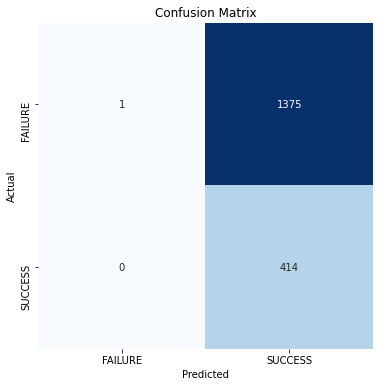


			Classification Report
		--------------------------------------
               precision    recall  f1-score   support

     FAILURE       1.00      0.00      0.00      1376
     SUCCESS       0.23      1.00      0.38       414

    accuracy                           0.23      1790
   macro avg       0.62      0.50      0.19      1790
weighted avg       0.82      0.23      0.09      1790



In [48]:
y_pred = np.array(cat.predict(X_test), dtype = np.int)

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names = ['FAILURE', 'SUCCESS'])

plt.figure(figsize= (6,6))
sns.heatmap(cm, annot = True, fmt = 'g', vmin = 0, cmap = 'Blues', cbar = False)
plt.xticks(ticks = np.arange(2) + 0.5, labels = ['FAILURE', 'SUCCESS'])
plt.yticks(ticks = np.arange(2) + 0.5, labels = ['FAILURE', 'SUCCESS'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print('\n\t\t\tClassification Report\n\t\t--------------------------------------\n', clr)

In [49]:
# Lightgbm

lgb = LGBMClassifier(verbose = 0)
lgb.fit(X_tr, y_train)
pred = lgb.predict(X_te)
pred_proba = lgb.predict_proba(X_te)[:,1]

print('roc_auc_score')
print(roc_auc_score(y_test, pred))
print(roc_auc_score(y_test, np.where(pred_proba > 0.233333, 1, 0)))
print('\nAccuracy_score')
print(accuracy_score(y_test, pred))
print(accuracy_score(y_test, np.where(pred_proba > 0.233333, 1, 0)))

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001615 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
roc_auc_score
0.5784497528367599
0.6495390265138749

Accuracy_score
0.7854748603351955
0.711731843575419


In [69]:
# xgboost

xgb = XGBClassifier(verbose = 0)
xgb.fit(X_tr, y_train)
pred1 = xgb.predict(X_te)
pred_proba1 = xgb.predict_proba(X_te)[:,1]

print('roc_auc_score')
print(roc_auc_score(y_test, pred1))
print(roc_auc_score(y_test, np.where(pred_proba1 > 0.283333, 1, 0)))
print('\nAccuracy_score')
print(accuracy_score(y_test, pred1))
print(accuracy_score(y_test, np.where(pred_proba1 > 0.283333, 1, 0)))

[00:57:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:57:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
roc_auc_score
0.5895018818110325
0.6403687085720706

Accuracy_score
0.7687150837988826
0.7106145251396648


In [98]:
o_f1 = []
o_a = []
threshold_value = np.linspace(0.2, 0.25, 40)

for thresh in threshold_value:
    pred_proba = cat.predict_proba(X_test)[:,1]
    o_f1.append(roc_auc_score(y_test, np.where(pred_proba > thresh, 1, 0)))
    o_a.append(accuracy_score(y_test, np.where(pred_proba > thresh, 1, 0)))

o_f1 = pd.Series(o_f1)
o_a = pd.Series(o_a)
threshold = pd.Series(threshold_value)

Threshold = pd.concat([o_a, o_f1, threshold], axis = 1, keys = ['catboost_accuacy','catboost_roc_auc', 'threshold'])

In [99]:
Threshold

,catboost_accuacy,catboost_roc_auc,threshold
0,0.640782,0.656585,0.200000
1,0.643017,0.658039,0.201282
2,0.647486,0.660946,0.202564
3,0.650279,0.662763,0.203846
4,0.652514,0.664216,0.205128
5,0.655307,0.665189,0.206410
6,0.659218,0.666888,0.207692
7,0.660894,0.666289,0.208974
8,0.662570,0.666535,0.210256
9,0.664804,0.667988,0.211538


In [50]:
skf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
cat_roc_auc_scores = []
cat_proba = []
thresh = 0.236767
for fold,(tr_in,te_in) in enumerate(skf.split(X, y)):
    print("=======Fold{fold}=======".format(fold=fold+1))
    X_train,X_test = X.iloc[tr_in],X.iloc[te_in]
    y_train,y_test = y.iloc[tr_in],y.iloc[te_in]
    cat1 = CatBoostClassifier(n_estimators = 300, verbose = 0)
    cat1.fit(X_train,y_train, eval_set = [(X_train,y_train),(X_test,y_test)], early_stopping_rounds = 500, use_best_model = True)
    cat_roc_auc_scores.append(roc_auc_score(y_test,cat1.predict(X_test)))
    cat_proba.append(roc_auc_score(y_test, np.where(cat1.predict_proba(X_test)[:,1] > thresh, 1, 0)))
    print(roc_auc_score(y_test,cat1.predict(X_test)))
    print(roc_auc_score(y_test, np.where(cat1.predict_proba(X_test)[:,1] > thresh, 1, 0)),'\n')

print('cat_roc_auc_score: ' + str(np.mean(cat_roc_auc_scores)))
print('cat_proba: ' + str(np.mean(cat_proba)))

=======Fold1=======
0.5792692397297508
0.6801828287422758 

=======Fold2=======
0.5723954225303388
0.6822339380353413 

=======Fold3=======
0.5590864433282134
0.646800060885328 

=======Fold4=======
0.5727856421326469
0.6462700817800656 

=======Fold5=======
0.5601630066281982
0.6337719844465662 

cat_roc_auc_score: 0.5687399508698296
cat_proba: 0.6578517787779155


In [80]:
# Using oversampling dataset
skf = StratifiedKFold(n_splits=4,random_state=43,shuffle=True)
cat_roc_auc_scores = []
cat_proba = []
thresh = 0.4
for fold,(tr_in,te_in) in enumerate(skf.split(X_tr_sam, y_tr_sam)):
    print("=======Fold{fold}=======".format(fold=fold+1))
    X_train,X_test = X_tr_sam.iloc[tr_in],X_tr_sam.iloc[te_in]
    y_train,y_test = y_tr_sam.iloc[tr_in],y_tr_sam.iloc[te_in]
    cat1 = CatBoostClassifier(n_estimators = 300, verbose = 0)
    cat1.fit(X_train,y_train, eval_set = [(X_train,y_train),(X_test,y_test)], early_stopping_rounds = 500, use_best_model = True)
    cat_roc_auc_scores.append(roc_auc_score(y_test,cat1.predict(X_test)))
    cat_proba.append(roc_auc_score(y_test, np.where(cat1.predict_proba(X_test)[:,1] > thresh, 1, 0)))
    print(roc_auc_score(y_test,cat1.predict(X_test)))
    print(roc_auc_score(y_test, np.where(cat1.predict_proba(X_test)[:,1] > thresh, 1, 0)),'\n')

print('cat_roc_auc_score: ' + str(np.mean(cat_roc_auc_scores)))
print('cat_proba: ' + str(np.mean(cat_proba)))

=======Fold1=======
0.7407039487285508
0.755350423816415 

=======Fold2=======
0.7585424850113707
0.7660088898077321 

=======Fold3=======
0.7357422157856626
0.7600263784007448 

=======Fold4=======
0.7214073652632668
0.7328736940105514 

cat_roc_auc_score: 0.7390990036972127
cat_proba: 0.7535648465088608


In [88]:
skf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
lgb_f1_scores = []
lgb_proba = []
thresh = 0.233333
for fold,(tr_in,te_in) in enumerate(skf.split(X, y)):
    print("=======Fold{fold}=======".format(fold=fold+1))
    X_train, X_test = X.iloc[tr_in],X.iloc[te_in]
    y_train, y_test = y.iloc[tr_in],y.iloc[te_in]
    
    lgb = LGBMClassifier(n_estimators = 500)
    lgb.fit(X_train,y_train, eval_set = [(X_train,y_train),(X_test,y_test)], early_stopping_rounds = 300, verbose = False)
    lgb_f1_scores.append(roc_auc_score(y_test,lgb.predict(X_test)))
    lgb_proba.append(roc_auc_score(y_test, np.where(lgb.predict_proba(X_test)[:,1] > thresh, 1, 0)))
    print(roc_auc_score(y_test,lgb.predict(X_test)))
    print(roc_auc_score(y_test, np.where(lgb.predict_proba(X_test)[:,1] > thresh, 1, 0)),'\n')

print('lgb_score: ' + str(np.mean(lgb_f1_scores)))
print('lgb_proba: ' + str(np.mean(lgb_proba)))

=======Fold1=======
0.588100045485306
0.6645375475654267 

=======Fold2=======
0.5696804904036421
0.6680822505431249 

=======Fold3=======
0.5690564157914402
0.650092019870757 

=======Fold4=======
0.5751726237425103
0.6433987850609546 

=======Fold5=======
0.5679798524914553
0.6506386040654795 

lgb_score: 0.5739978855828708
lgb_proba: 0.6553498414211484


In [90]:
# Using sampling
skf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
lgb_f1_scores = []
lgb_proba = []
thresh = 0.4
for fold,(tr_in,te_in) in enumerate(skf.split(X_tr_sam, y_tr_sam)):
    print("=======Fold{fold}=======".format(fold=fold+1))
    X_train, X_test = X_tr_sam.iloc[tr_in],X_tr_sam.iloc[te_in]
    y_train, y_test = y_tr_sam.iloc[tr_in],y_tr_sam.iloc[te_in]
    
    lgb = LGBMClassifier(n_estimators = 500)
    lgb.fit(X_train,y_train, eval_set = [(X_train,y_train),(X_test,y_test)], early_stopping_rounds = 300, verbose = False)
    lgb_f1_scores.append(roc_auc_score(y_test,lgb.predict(X_test)))
    lgb_proba.append(roc_auc_score(y_test, np.where(lgb.predict_proba(X_test)[:,1] > thresh, 1, 0)))
    print(roc_auc_score(y_test,lgb.predict(X_test)))
    print(roc_auc_score(y_test, np.where(lgb.predict_proba(X_test)[:,1] > thresh, 1, 0)),'\n')

print('lgb_score: ' + str(np.mean(lgb_f1_scores)))
print('lgb_proba: ' + str(np.mean(lgb_proba)))

=======Fold1=======
0.7487906871609403
0.7578435804701628 

=======Fold2=======
0.7374797996121526
0.7465093729799612 

=======Fold3=======
0.7357183257918553
0.7384372979961216 

=======Fold4=======
0.7522180025856496
0.7670572074983839 

=======Fold5=======
0.7513615061409179
0.7643301551389787 

lgb_score: 0.7451136642583032
lgb_proba: 0.7548355228167216


In [52]:
import tensorflow as tf

In [57]:
inputs = tf.keras.Input(shape = (X_tr.shape[1],))
x = tf.keras.layers.Dense(128, activation = 'relu')(inputs)
x1 = tf.keras.layers.Dense(128, activation = 'relu')(x)
x2 = tf.keras.layers.Dense(128, activation = 'relu')(x1)
x3 = tf.keras.layers.Dense(128, activation = 'relu')(x2)
x4 = tf.keras.layers.Dense(128, activation = 'relu')(x3)
x5 = tf.keras.layers.Dense(128, activation = 'relu')(x4)
x6 = tf.keras.layers.Dense(128, activation = 'relu')(x5)
x7 = tf.keras.layers.Dense(128, activation = 'relu')(x6)
x8 = tf.keras.layers.Dense(128, activation = 'relu')(x7)
x9 = tf.keras.layers.Dense(128, activation = 'relu')(x8)
x10 = tf.keras.layers.Dense(128, activation = 'relu')(x9)
x11 = tf.keras.layers.Dense(128, activation = 'relu')(x10)
x12 = tf.keras.layers.Dense(128, activation = 'relu')(x11)
x13 = tf.keras.layers.Dense(128, activation = 'relu')(x12)
x14 = tf.keras.layers.Dense(128, activation = 'relu')(x13)
x15 = tf.keras.layers.Dense(128, activation = 'relu')(x14)
x16 = tf.keras.layers.Dense(128, activation = 'relu')(x15)
outputs = tf.keras.layers.Dense(1, activation = 'sigmoid')(x16)

model = tf.keras.Model(inputs = inputs, outputs = outputs)

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss = 'binary_crossentropy',
    metrics = [
        'accuracy',
        tf.keras.metrics.AUC(name = 'auc')
    ]
)

history = model.fit(
    X_tr,
    y_train,
    validation_split = 0.2,
    batch_size = 32,
    epochs = 100,
    verbose = False,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor = 'val_loss',
            patience = 3,
            restore_best_weights = True
        )
    ]
)

In [58]:
results = model.evaluate(X_te, y_test, verbose = 0)
print('Test Loss: {:.5f}'.format(results[0]))
print('Test Accuracy: {:.2f}%'.format(results[1] * 100))
print('Test ROC AUC: {:.5f}'.format(results[2]))

Test Loss: 0.48687
Test Accuracy: 78.38%
Test ROC AUC: 0.71528


In [104]:
from keras.layers import Dense
from keras.models import Sequential
 
# define the neural network model
def define_model(n_input):
	# define model
	model = Sequential()
	# define first hidden layer and visible layer
	model.add(Dense(10, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
	# define output layer
	model.add(Dense(1, activation='sigmoid'))
	# define loss and optimizer
	model.compile(loss='binary_crossentropy', optimizer='sgd')
	return model

# get the model
n_input = X_tr.shape[1]
model = define_model(n_input)
# fit model
weights = {0:1, 1:100}
history = model.fit(X_tr, y_train, class_weight=weights, epochs=100, verbose=0)
# evaluate model
yhat = model.predict(X_te)
score = roc_auc_score(y_test, yhat)
print('ROC AUC: %.3f' % score)

ROC AUC: 0.712


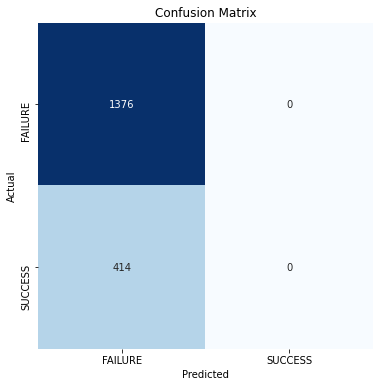


			Classification Report
		--------------------------------------
               precision    recall  f1-score   support

     FAILURE       0.77      1.00      0.87      1376
     SUCCESS       0.00      0.00      0.00       414

    accuracy                           0.77      1790
   macro avg       0.38      0.50      0.43      1790
weighted avg       0.59      0.77      0.67      1790



In [99]:
y_pred = np.array(model1.predict(X_te), dtype = np.int)

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names = ['FAILURE', 'SUCCESS'])

plt.figure(figsize= (6,6))
sns.heatmap(cm, annot = True, fmt = 'g', vmin = 0, cmap = 'Blues', cbar = False)
plt.xticks(ticks = np.arange(2) + 0.5, labels = ['FAILURE', 'SUCCESS'])
plt.yticks(ticks = np.arange(2) + 0.5, labels = ['FAILURE', 'SUCCESS'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print('\n\t\t\tClassification Report\n\t\t--------------------------------------\n', clr)

#### Feature Importance and Selection

In [77]:
feat_imp_df = pd.DataFrame(cat.feature_importances_, columns = ['Importance'])
feat_imp_df['Features'] = all_data[feature].columns

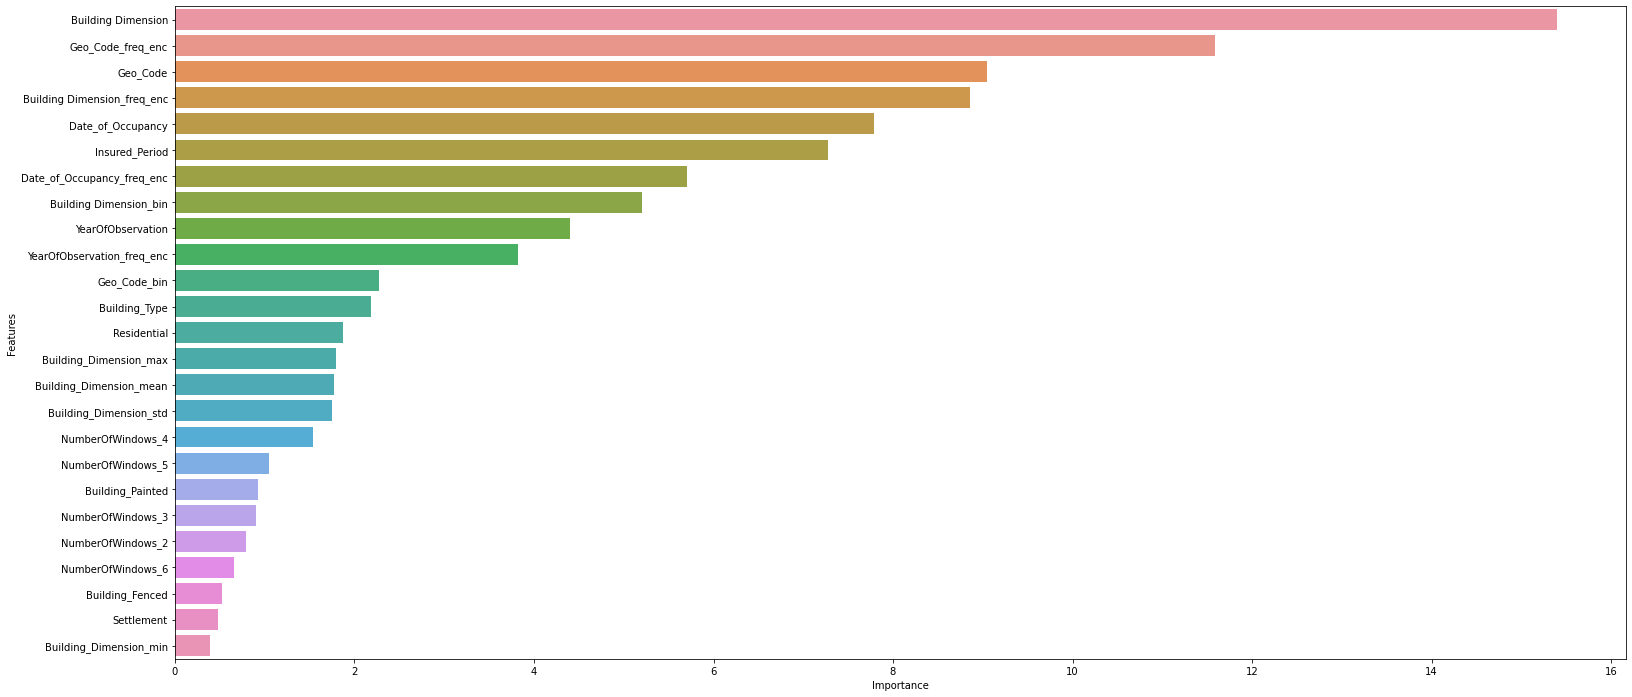

In [80]:
plt.figure(figsize = (26, 12))
sns.barplot(x = 'Importance', y = 'Features', data = feat_imp_df.sort_values(by = ['Importance'], ascending = False).head(25))
plt.show()

In [81]:
new_feat = feat_imp_df.sort_values(by = ['Importance'], ascending = False).head(25)['Features'].to_list()
# Selecting all features

#### Hyperparameter Tunning

In [82]:
import optuna

In [83]:
X = train_df[new_feat]
y = train_df[target]

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 43)

In [86]:
# Catboost
cat = CatBoostClassifier(verbose = 0)
cat.fit(X_train, y_train)
pred = cat.predict(X_test)
pred_proba = cat.predict_proba(X_test)[:,1]

print('roc_auc_score')
print(roc_auc_score(y_test, pred))
print(roc_auc_score(y_test, np.where(pred_proba > 0.236767, 1, 0)))
print('\nAccuracy_score')
print(accuracy_score(y_test, pred))
print(accuracy_score(y_test, np.where(pred_proba > 0.236767, 1, 0)))

roc_auc_score
0.5954545135378048
0.6588058925963375

Accuracy_score
0.7843575418994413
0.6944134078212291


In [87]:
train_pool = Pool(X_train, y_train)
eval_pool = Pool(X_test, y_test)

def objectiveCB(trial):
    model = CatBoostClassifier(
        iterations=trial.suggest_int("iterations", 50, 1000),
        depth=trial.suggest_int("depth", 4, 10),
        learning_rate=trial.suggest_loguniform("learning_rate", 0.01, 0.3),
        random_strength=trial.suggest_int("random_strength", 0, 100),
        bagging_temperature=trial.suggest_loguniform("bagging_temperature", 0.01, 100.0),
        od_type=trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
        od_wait=trial.suggest_int("od_wait", 10, 50),
        random_state = trial.suggest_int("random_state", 40, 100),
    )
    
    model.fit(train_pool, verbose=False)
    pred = model.predict(eval_pool)
    score = accuracy_score(y_test, np.rint(pred))
    return score

study = optuna.create_study(direction="maximize")
study.optimize(objectiveCB, n_trials = 40)

[I 2022-02-12 02:55:58,714] A new study created in memory with name: no-name-b9baa00a-7593-4c5d-856c-7ddb59620f12
[I 2022-02-12 02:55:59,689] Trial 0 finished with value: 0.7793296089385475 and parameters: {'iterations': 105, 'depth': 5, 'learning_rate': 0.18356184954591248, 'random_strength': 69, 'bagging_temperature': 74.30612596657167, 'od_type': 'IncToDec', 'od_wait': 43, 'random_state': 59}. Best is trial 0 with value: 0.7793296089385475.
[I 2022-02-12 02:56:02,424] Trial 1 finished with value: 0.7726256983240224 and parameters: {'iterations': 395, 'depth': 4, 'learning_rate': 0.01305125604508486, 'random_strength': 47, 'bagging_temperature': 0.7511236422689033, 'od_type': 'Iter', 'od_wait': 21, 'random_state': 41}. Best is trial 0 with value: 0.7793296089385475.
[I 2022-02-12 02:56:17,911] Trial 2 finished with value: 0.7636871508379889 and parameters: {'iterations': 753, 'depth': 9, 'learning_rate': 0.15623636226152052, 'random_strength': 37, 'bagging_temperature': 0.54103411345

In [131]:
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print('Best Parameters: {}'.format(trial.params))
# print(trial)

Accuracy: 0.788826815642458
Best Parameters: {'iterations': 431, 'depth': 4, 'learning_rate': 0.04933219343314211, 'random_strength': 64, 'bagging_temperature': 0.6933444974046692, 'od_type': 'Iter', 'od_wait': 42, 'random_state': 71}


In [132]:
params = trial.params

In [138]:
cat = CatBoostClassifier(**params, verbose = 0)
cat.fit(X_train,y_train)
pred = cat.predict(X_test)
pred_proba = cat.predict_proba(X_test)[:,1]

print('roc_auc_score')
print(roc_auc_score(y_test, pred))
print(roc_auc_score(y_test, np.where(pred_proba > 0.214483, 1, 0)))
print('\nAccuracy_score')
print(accuracy_score(y_test, pred))
print(accuracy_score(y_test, np.where(pred_proba > 0.214483, 1, 0)))

roc_auc_score
0.5907622739018088
0.6754806341984047

Accuracy_score
0.788826815642458
0.6698324022346369


In [74]:
cat_roc_auc = []
cat_a = []
threshold_value = np.linspace(0.1, 0.3, 50)

for thresh in threshold_value:
    pred_proba = cat.predict_proba(X_te)[:,1]
    cat_roc_auc.append(roc_auc_score(y_test, np.where(pred_proba > thresh, 1, 0)))
    cat_a.append(accuracy_score(y_test, np.where(pred_proba > thresh, 1, 0)))

cat_roc_auc = pd.Series(cat_roc_auc)
cat_a = pd.Series(cat_a)
threshold = pd.Series(threshold_value)

Threshold = pd.concat([cat_a, cat_roc_auc, threshold], axis = 1, keys = ['catboost_accuacy','catboost_roc_auc_score', 'threshold'])

In [75]:
Threshold

,catboost_accuacy,catboost_roc_auc_score,threshold
0,0.429050,0.579661,0.100000
1,0.441341,0.586811,0.104082
2,0.457542,0.594816,0.108163
3,0.472626,0.601249,0.112245
4,0.482123,0.604049,0.116327
5,0.494413,0.608666,0.120408
6,0.501676,0.609168,0.124490
7,0.512291,0.611850,0.128571
8,0.519553,0.613197,0.132653
9,0.527933,0.615270,0.136735


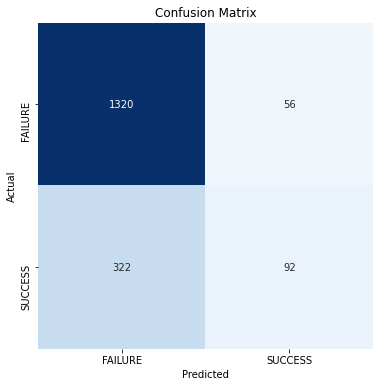


			Classification Report
		--------------------------------------
               precision    recall  f1-score   support

     FAILURE       0.80      0.96      0.87      1376
     SUCCESS       0.62      0.22      0.33       414

    accuracy                           0.79      1790
   macro avg       0.71      0.59      0.60      1790
weighted avg       0.76      0.79      0.75      1790



In [139]:
y_pred = np.array(cat.predict(X_test), dtype = np.int)

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names = ['FAILURE', 'SUCCESS'])

plt.figure(figsize= (6,6))
sns.heatmap(cm, annot = True, fmt = 'g', vmin = 0, cmap = 'Blues', cbar = False)
plt.xticks(ticks = np.arange(2) + 0.5, labels = ['FAILURE', 'SUCCESS'])
plt.yticks(ticks = np.arange(2) + 0.5, labels = ['FAILURE', 'SUCCESS'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print('\n\t\t\tClassification Report\n\t\t--------------------------------------\n', clr)

### Submission

In [100]:
X_test_n = test_df[feature]

In [101]:
X_test_n

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,...,YearOfObservation_freq_enc,Geo_Code_freq_enc,Building Dimension_freq_enc,Date_of_Occupancy_freq_enc,Building_Dimension_mean,Building_Dimension_std,Building_Dimension_min,Building_Dimension_max,Building Dimension_bin,Geo_Code_bin
0,2013,1.000000,0,0,1,0,0,300.000000,1,1960.0,...,0.252908,0.000587,0.017597,0.257308,1811.968190,1970.955546,1.0,17860.0,0,0
1,2016,0.997268,0,0,1,0,0,300.000000,1,1960.0,...,0.140190,0.000587,0.017597,0.257308,1811.968190,1970.955546,1.0,17860.0,0,0
2,2013,0.369863,0,0,0,1,1,790.000000,1,1960.0,...,0.252908,0.000587,0.001173,0.257308,1811.968190,1970.955546,1.0,17860.0,1,0
3,2014,1.000000,0,0,1,0,0,1405.000000,1,2004.0,...,0.188679,0.000196,0.000489,0.004204,1811.968190,1970.955546,1.0,17860.0,3,0
4,2016,1.000000,0,0,1,0,0,1405.000000,1,2004.0,...,0.140190,0.000196,0.000489,0.004204,1811.968190,1970.955546,1.0,17860.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3064,2015,1.000000,0,0,0,1,1,1660.373691,4,1900.0,...,0.151921,0.023365,0.001271,0.042233,2034.510018,2502.759303,1.0,18270.0,3,0
3065,2012,1.000000,0,0,0,1,1,1660.373691,2,1948.0,...,0.266302,0.023365,0.001271,0.000782,1782.691283,2271.924334,10.0,20940.0,3,0
3066,2012,1.000000,0,0,0,1,1,1660.373691,2,1993.0,...,0.266302,0.023365,0.001271,0.001173,1782.691283,2271.924334,10.0,20940.0,3,0
3067,2013,1.000000,0,0,0,1,1,1660.373691,1,1800.0,...,0.252908,0.023365,0.001271,0.002835,1811.968190,1970.955546,1.0,17860.0,3,0


In [121]:
thresh = 0.236767
X_test =  sc.transform(X_test_n)
# pred_cat = np.where(cat.predict_proba(X_test_n)[:,1] > thresh, 1, 0)
pred_cat = model.predict(X_test_n)
pred_cat

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [122]:
data = pd.DataFrame(pred_cat, index = test_df['Customer Id'], columns = ['Claim'])
data.to_csv('cat_claim.csv')

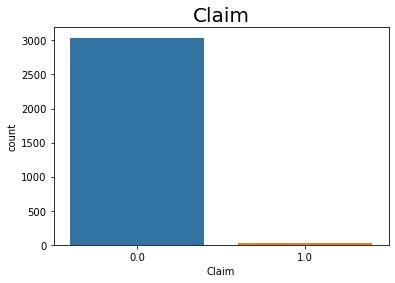

In [123]:
all_ = pd.read_csv('cat_claim.csv')
sns.countplot(all_.Claim, data=all_)
plt.title('Claim', fontdict={'size':20});

In [ ]:
from joblib import dump, load

dump(clf, 'filename.joblib') 